# [Matplotlib](https://matplotlib.org) 

Данные настолько хороши, насколько они представлены... 

Визуализация - это самый простой способ анализа и поглощения информации. Визуальные материалы помогают легко понять сложную проблему. Они помогают в выявлении закономерностей, отношений и выбросов в данных. Часто, визуализация помогает лучше и быстрее  выявить проблемные места. Выводы, полученные из визуальных элементов, могут быть основой для построения стратегии. 

Визуализация также является важным элементом анализа данных и машинного обучения, поскольку визуальное представление данных и различных аспектов процесса анализа может дать дополнительную важную информацию.

**Matplotlib** - основная библиотека для построения научных графиков на языке программирования Python. Она включает функции для создания высококачественных визуализаций типа линейных диаграмм, гистограмм, диаграмм разброса и [т.д.] В комплексе с другими Python-пакетами Matplotlib предоставляет возможности, подобные MATLAB. Кроме этого, средствами Matplotlib можно обрабатывать изображения в различных форматах (JPEG, PDF, PNG, ...), а также создавать анимированные изображения.

Графики, отображаемые с помощью Matplotlib можно выводить и встраивать в приложения, написанные с использованием различных библиотек(различных backend-ов) для построения интерфейса. Например: wxPython, pyQT и pyGTK. Для интеграции Matplotlib с другими библиотеками используется пакет matplotlib.backends

In [2]:
import matplotlib as mpl   # Импортируем модуль matplotlib
print(mpl.__version__)   # Выведем информацию о версии используемой библиотеки
print(mpl.get_backend()) # backend по умолчанию

3.5.2
module://matplotlib_inline.backend_inline


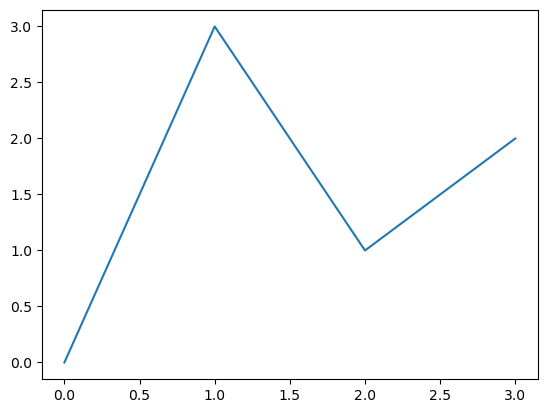

In [3]:
import matplotlib.pyplot as plt

plt.plot([0, 1, 2, 3], [0, 3, 1, 2])
plt.show()

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


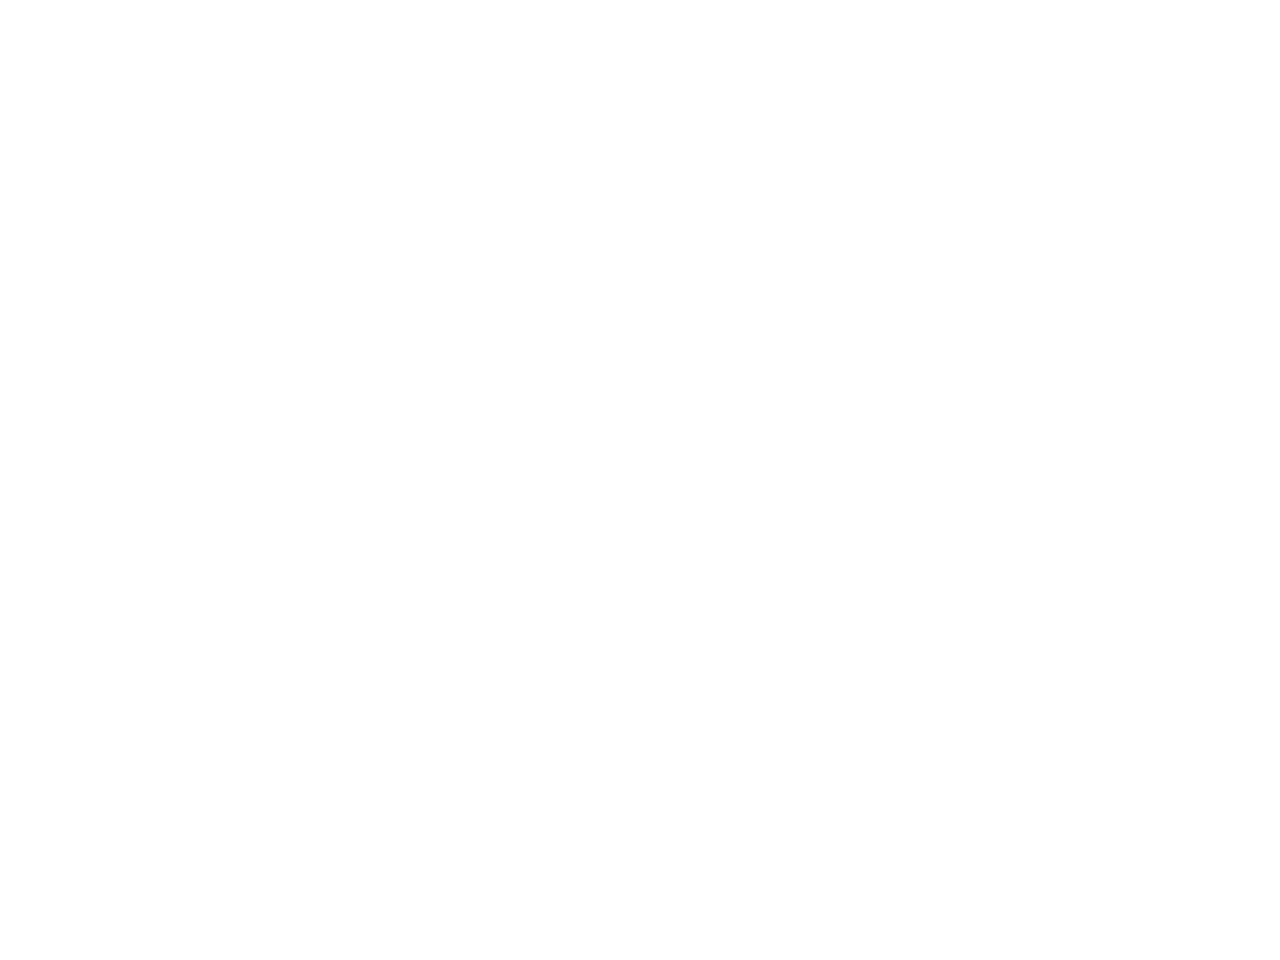

In [5]:
plt.plot([0, 1, 2, 3], [0, 3, 1, 2])
plt.show()

In [6]:
print(mpl.get_backend())

nbAgg


In [7]:
plt.plot([0, 1, 2, 3], [2, 1, 3, 0])
plt.show()

In [8]:
%matplotlib inline

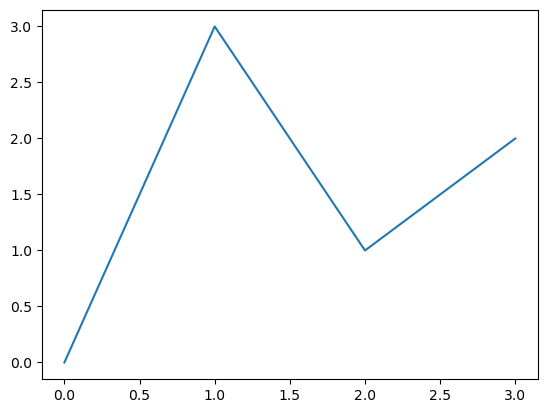

In [9]:
import matplotlib.pyplot as plt
plt.plot([0, 1, 2, 3], [0, 3, 1, 2])
plt.show()

In [10]:
print(mpl.get_backend())

module://matplotlib_inline.backend_inline


In [11]:
mpl.use('nbagg') # Подключаем Backend для работы в Jupyter
print(mpl.get_backend())

nbAgg


<IPython.core.display.Javascript object>


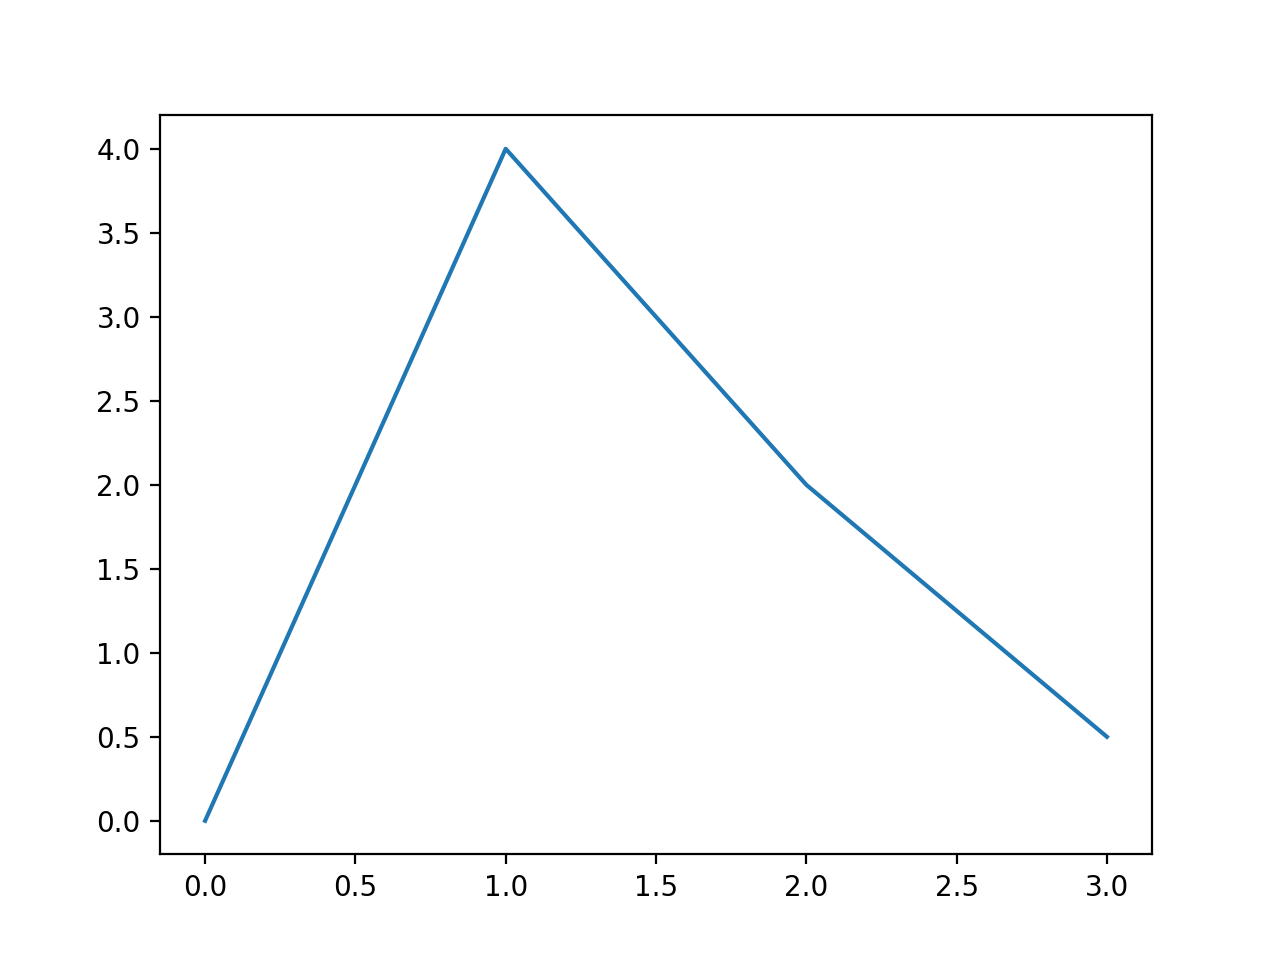

In [12]:
import matplotlib.pyplot as plt
plt.plot([0, 1, 2, 3], [0, 4, 2, 0.5])
plt.show()

## Pyplot

Интерфейс pyplot позволяет пользователю сосредоточиться на выборе готовых решений и настройке базовых параметров рисунка. Это его главное достоинство, поэтому изучение matplotlib лучше всего начинать именно с интерфейса pyplot.

Существует де-факто стандарт вызова pyplot в python:

In [13]:
%matplotlib inline

In [14]:
from matplotlib import pyplot as plt

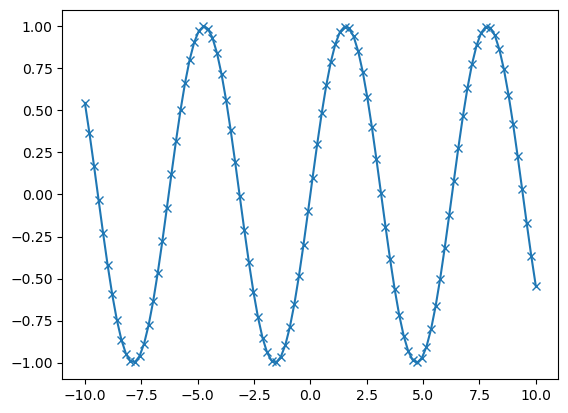

In [15]:
import numpy as np

x = np.linspace(-10, 10, 100)

y = np.sin(x)
plt.plot(x, y, marker="x")


## Иерархическая структура рисунка в matplotlib

Главной единицей (объектом самого высокого уровня) при работе с matplotlib является рисунок (Figure). Любой рисунок в matplotlib имеет вложенную структуру и чем-то напоминает матрёшку. Пользовательская работа подразумевает операции с разными уровнями этой матрёшки: 

> Figure(Рисунок) -> Axes(Область рисования) -> Axis(Координатная ось)

+ **Рисунок (Figure)**

Рисунок является объектом самого верхнего уровня, на котором располагаются одна или несколько областей рисования (Axes), элементы рисунка Artisits (заголовки, легенда и т.д.) и основа-холст (Canvas). На рисунке может быть несколько областей рисования Axes, но данная область рисования Axes может принадлежать только одному рисунку Figure.

+ **Область рисования (Axes)**

Область рисования является объектом среднего уровня, который является, наверное, главным объектом работы с графикой matplotlib в объектно-ориентированом стиле. Это то, что ассоциируется со словом "plot", это часть изображения с пространством данных. Каждая область рисования Axes содержит две (или три в случае трёхмерных данных) координатных оси (Axis объектов), которые упорядочивают отображение данных.

+ **Координатная ось (Axis)**

Координатная ось являются объектом среднего уровня, которые определяют область изменения данных, на них наносятся деления ticks и подписи к делениям ticklabels. Расположение делений определяется объектом Locator, а подписи делений обрабатывает объект Formatter. Конфигурация координатных осей заключается в комбинировании различных свойств объектов Locator и Formatter.

+ **Элементы рисунка (Artists)**

Элементы рисунка Artists являются как бы красной линией для всех иерархических уровней. Практически всё, что отображается на рисунке является элементом рисунка (Artist), даже объекты Figure, Axes и Axis. Элементы рисунка Artists включают в себя такие простые объекты как текст (Text), плоская линия (Line2D), фигура (Patch) и другие. 

Когда происходит отображение рисунка (figure rendering), все элементы рисунка Artists наносятся на основу-холст (Canvas). Большая часть из них связывается с областью рисования Axes. Также элемент рисунка не может совместно использоваться несколькими областями Axes или быть перемещён с одной на другую.

Рисунки в matplotlib создаются путём последовательного вызова команд: либо в интерактивном режиме (в консоли), либо в скрипте (текстовый файл с python-кодом). Графические элементы (точки, линии, фигуры и т.д.) наслаиваются одна на другую последовательно. При этом последующие перекрывают предыдущие, если они занимают общее участки на рисунке. 

В matplotlib работает правило **"текущей области" ("current axes")**, которое означает, что все графические элементы наносятся на текущую область рисования. Несмотря на то, что областей рисования может быть несколько, одна из них всегда является текущей.

Как было сказано выше самым главным объектом в matplotlib является рисунок Figure. Поэтому создание научной графики нужно начинать именно с создания рисунка. Создать рисунок в matplotlib означает задать форму, размеры и свойства основы-холста, на котором будет создаваться будущий график. 

Создать рисунок figure позволяет метод plt.figure(). После вызова любой графической команды, то есть функции, которая создаёт какой-либо графический объект, например, plt.scatter() или plt.plot(), всегда существует хотя бы одна область для рисования. 

Чтобы результат рисования, то есть текущее состояние рисунка, отразилось на экране, можно воспользоваться командой `plt.show()`. Будут показаны все рисунки (figures), которые были созданы.

#### Пример 1

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

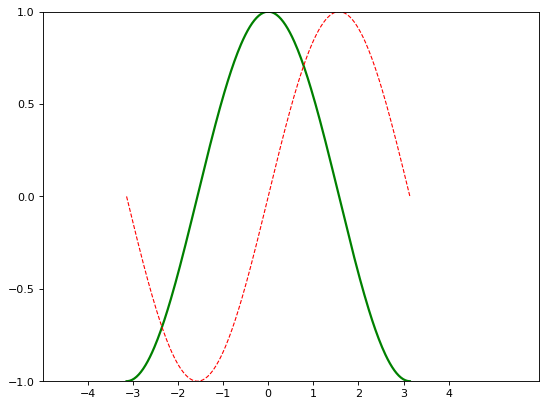

In [17]:
plt.figure(figsize=(8, 6), dpi=80) # Создание рисунка размером 10x8 дюймов, 60 точек на дюйм

plt.subplot(1, 1, 1) # Создание области рисования 1x1

X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, color="green", linewidth=2.0, linestyle="-") # Построить график косинуса с заданными параметрами цвета, ширины и типа линии
plt.plot(X, S, color="red", linewidth=1.0, linestyle="--") # Построить график синуса с заданными параметрами цвета, ширины и типа линии

plt.xlim(-5.0, 6.0) # Установим пределы по шкале абсцисс
plt.xticks(np.linspace(-4, 4, 9)) # Деления по шкале абсцисс

plt.ylim(-1.0, 1.0) # Установим пределы по шкале ординат
plt.yticks(np.linspace(-1, 1, 5)) # Деления по шкале ординат

# plt.savefig("exercise_1.png", dpi=72) # Сохранить рисунок

plt.show() # Показать рисунок

#### Пример 2

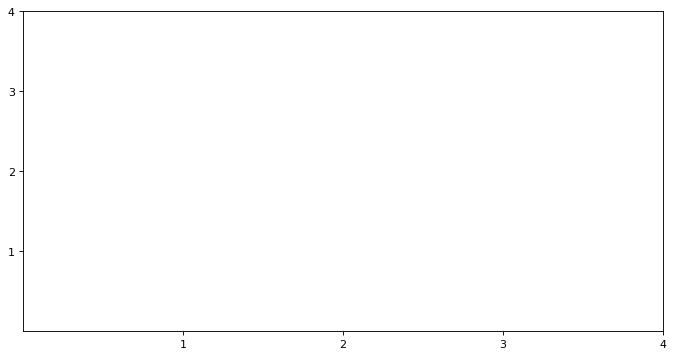

In [18]:
# Figure
fig = plt.figure(figsize=(4, 4), dpi=80)
ax = fig.add_axes([0, 0, 2.0, 1.0]) # Размеры [слева, снизу, ширина, высота] новых осей. Все количества указаны в долях от ширины и высоты рисунка

ax.set_yticks([1, 2, 3, 4])
ax.set_xticks([1, 2, 3, 4])

# ax.text(0.02, 3.82, "Figure", fontsize=18)

# Axes
# ax = fig.add_axes([0.25, 0.25, 0.5, 0.5])
# ax.text(0.03, 0.88, "Axes", fontsize=18)
# ax.set_yticks([])
# ax.set_xticks([])

### Выполните упражнение 1

### Несколько областей в одном рисунке

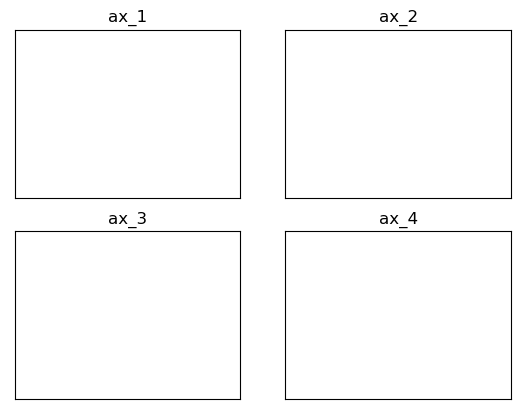

In [19]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])

plt.show()

**Add_subplot()** разбивает Figure на указанное количество строк и столбцов. После такого разбиения Figure можно представить как таблицу (или координатную сетку). Затем область Axes помещается в указанную ячейку. Для всего этого add_subplot() необходимо всего три числа в качестве параметров:

1) первое - количество строк;

2) второе - количество столбцов;

3) третье - индекс ячейки.

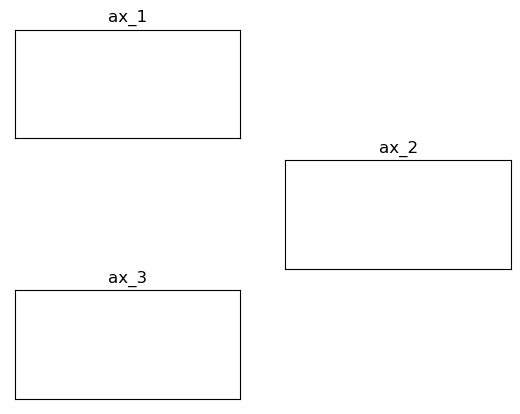

In [20]:
fig = plt.figure()

ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 4)
ax_3 = fig.add_subplot(3, 2, 5)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])

plt.show()

**Subplot2grid()** создает подобласть внутри регулярной сетки.

1) первая пара чисел - количество строк и столбцов сетки, в которых следует поместить область;

2) вторая пара чисел - номер строки и номер столбца, куда должна быть помещена область;

3) количество рядов охватываемых областью.

[None, None, None, None, None]

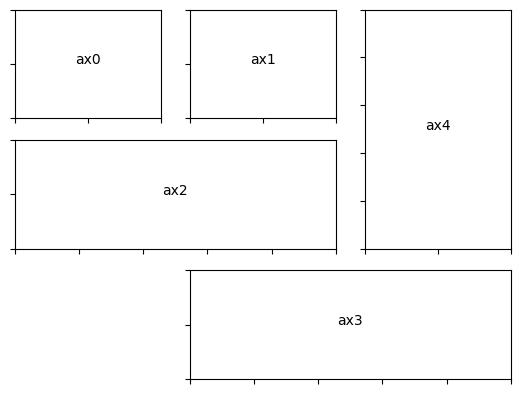

In [21]:
fig1 = plt.figure()

def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

ax0 = plt.subplot2grid((3, 3), (0, 0))
ax1 = plt.subplot2grid((3, 3), (0, 1))
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (2, 1), colspan=3)
ax4 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)

axes = [ax0, ax1, ax2, ax3, ax4]
[ax.text(0.5, 0.5, "ax%d" % n, horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes]

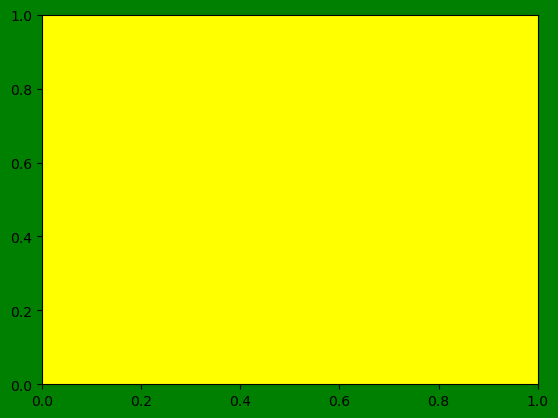

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set(facecolor = 'green')
ax.set(facecolor = 'yellow')

plt.show()

#### Пример 3

Список №1 текущих областей рисования:  []
Тип объекта Figure: <class 'matplotlib.figure.Figure'>
Список №2 текущих областей рисования:  [<AxesSubplot:>]


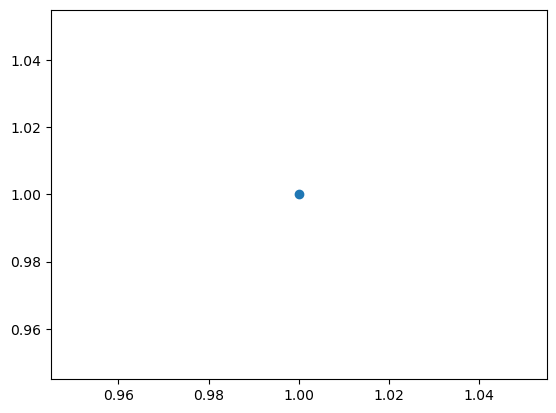

In [23]:
fig = plt.figure()   # Создание объекта Figure
print ('Список №1 текущих областей рисования: ', fig.axes)   # Список текущих областей рисования пуст
print ('Тип объекта Figure:', type(fig))   # Тип объекта Figure
plt.scatter(1.0, 1.0)   # scatter - метод для нанесения маркера в точке (1.0, 1.0)

# После нанесения графического элемента в виде маркера список текущих областей состоит из одной области
print ('Список №2 текущих областей рисования: ', fig.axes)

plt.show()

#### Пример 4 : Легенда

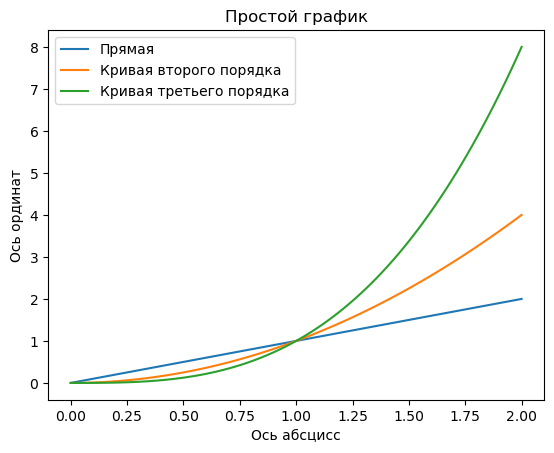

In [24]:
import numpy as np

x = np.linspace(0, 2, 100)

plt.plot(x, x, label='Прямая')
plt.plot(x, x**2, label='Кривая второго порядка')
plt.plot(x, x**3, label='Кривая третьего порядка')

plt.xlabel('Ось абсцисс')
plt.ylabel('Ось ординат')

plt.title("Простой график")

plt.legend()  # вывести легенду

plt.show()

Обычно рисунок в matplotlib представляет собой прямоугольную область, заданную в относительных координатах: от 0 до 1 включительно по обеим осям. Второй распространённый вариант типа рисунка - круглая область (polar plot).

Чтобы сохранить получившийся рисунок нужно воспользоваться методом `plt.savefig()`. Он сохраняет текущую конфигурацию текущего рисунка в графический файл с некоторым расширением (png, jpeg, pdf и др.), который можно задать через параметр `fmt`. Поэтому её нужно вызывать в конце исходного кода, после вызова команд создария рисунка/графика. Если в python-скрипте создать несколько рисунков figure и попытаться сохранить их одной командой `plt.savefig()`, то будет сохранён последний рисунок figure.

<class 'matplotlib.axes._axes.Axes'>


/var/folders/xc/5y8sdzl55133mlz80hkp_0sh0000gn/T/ipykernel_54268/1511808762.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('fig1.png', fmt='png')
/var/folders/xc/5y8sdzl55133mlz80hkp_0sh0000gn/T/ipykernel_54268/1511808762.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('fig2.pdf', fmt='pdf')


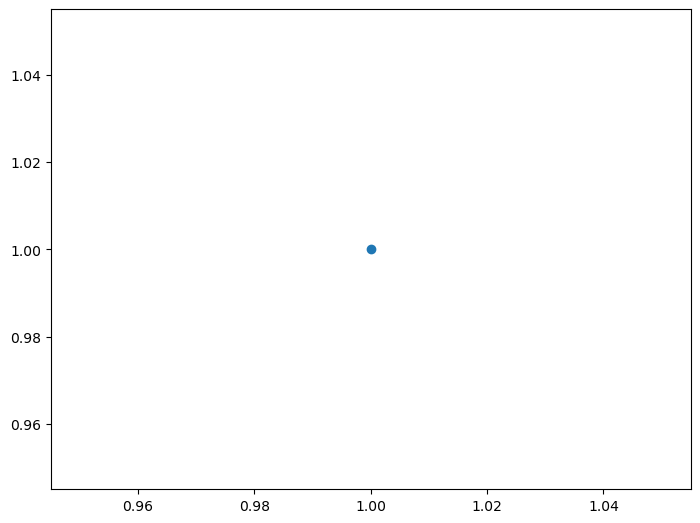

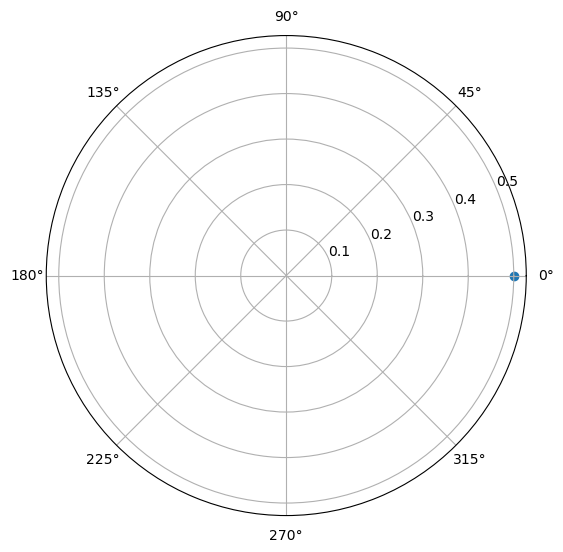

In [25]:
fig = plt.figure()
# Добавление на рисунок прямоугольной (по умолчанию) области рисования
ax = fig.add_axes([0, 0, 1, 1])
print (type(ax))
plt.scatter(1.0, 1.0)
plt.savefig('fig1.png', fmt='png')


fig = plt.figure()
# Добавление на рисунок круговой области рисования
ax = fig.add_axes([0, 0, 1, 1], polar=True)
plt.scatter(0.0, 0.5)
plt.savefig('fig2.pdf', fmt='pdf')

plt.show()

### Элементы рисунка Artists

Всё пространство рисунка *Figure* (прямоугольной или иной формы) можно использовать для нанесения других элементов рисунка, например, *контейнеров Axes* - областей рисунков, графических примитивов в виде линий, фигур, текста и так далее. В любом случае каждый рисунок можно структурно представить следующим образом:

1. Область рисования *Axes*
    + Заголовок области рисования -> `plt.title()`;
    



2. Ось абсцисс *Xaxis* 
    + Подпись оси абсцисс OX -> `plt.xlabel()`;
    
   
   

3. Ось ординат *Yaxis* 
    + Подпись оси ординат OY -> `plt.ylabel()`;
    
 
 

4. Легенда -> `plt.legend()`

5. [Цветовая шкала](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.colorbar.html) -> `plt.colorbar()`
    + Подпись оси абсцисс *OX* -> `cbar.ax.set_xlabel()`;
    
    + Подпись оси ординат *OY* -> `cbar.ax.set_ylabel()`;
     



7. Деления на оси абсцисс *OX* -> `plt.xticks()`

8. Деления на оси ординат *OY* -> `plt.yticks()`

Таким образом, для каждого из перечисленных уровней-контейнеров есть возможность нанести заголовок (*title*) или подпись (*label*). Подписи к рисунку облегчают понимание того, в каких единицах представлены данные на графике или диаграмме.

Также часто на рисунок наносятся линии вспомогательной сетки (grid). В pyplot она вызывается командой `plt.grid()`. Вспомогательная сетка связана с делениями координатных осей (ticks), которые определяются автоматически исходя из значений выборки. В дальнейшем будет показано, как определять положение и задавать значения делений на координатных осях. Стоит сказать, что в matplotlib существуют главные деления (*major ticks*) и вспомогательные (*minor ticks*) для каждой координатной оси. По умолчанию рисуются только главные делений и связанные с ними линии сетки grid. В плане настройки главные деления ничем не отличаются от вспомогательных.

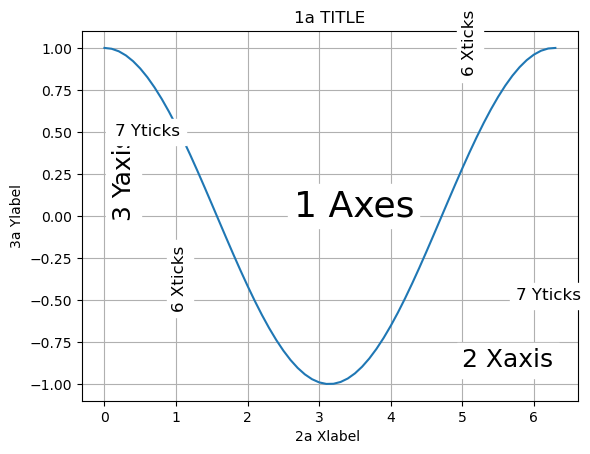

In [26]:
# Элементы простого рисунка 

lag = 0.1
x = np.arange(0.0, 2*np.pi+lag, lag)
y = np.cos(x)

fig = plt.figure()
plt.plot(x, y)

plt.text(np.pi-0.5, 0,  '1 Axes', fontsize=26, bbox=dict(color='w'))
plt.text(0.1, 0, '3 Yaxis', fontsize=18, bbox=dict(color='w'), rotation=90)
plt.text(5, -0.9, '2 Xaxis', fontsize=18, bbox=dict(color='w'))

plt.title('1a TITLE')
plt.ylabel('3a Ylabel')
plt.xlabel('2a Xlabel ')

plt.text(5, 0.85, '6 Xticks', fontsize=12, bbox=dict(color='w'), rotation=90)
plt.text(0.95, -0.55, '6 Xticks', fontsize=12, bbox=dict(color='w'), rotation=90)

plt.text(5.75, -0.5, '7 Yticks', fontsize=12, bbox=dict(color='w'))
plt.text(0.15, 0.475, '7 Yticks', fontsize=12, bbox=dict(color='w'))

plt.grid(True)

plt.show()

### Свойства графических элементов
 
Многообразие и удобство создания графики в matplotlib обеспечивается не только за счёт созданных графических команд, но и за счёт богатого арсенала по конфигурации типовых форм. Эта настройка включает в себя работу с цветом, формой, типом линии или маркера, толщиной линий, степенью прозрачности элементов, размером и типом шрифта и другими свойствами.

Параметры, которые определяют эти свойства в различных графических командах, обычно имеют одинаковый синтаксис, то есть называются одинаково. Стандартным способом задания свойств какого либо создаваемого объекта (или метода) является передача по ключу: ключ=значение. Наиболее часто встречаемые названия параметров изменения свойств графических объектов перечислены ниже:

+ *color/colors/c* - цвет;

+ *linewidth/linewidths* - толщина линии;

+ *linestyle* - тип линии;

+ *alpha* - степень прозрачности (от полностью прозрачного 0 до непрозрачного 1);

+ *fontsize* - размер шрифта;

+ *marker* - тип маркера;

+ *s* - размер маркера в методе plt.scatter(только цифры);

+ *rotation* - поворот строки на X градусов.


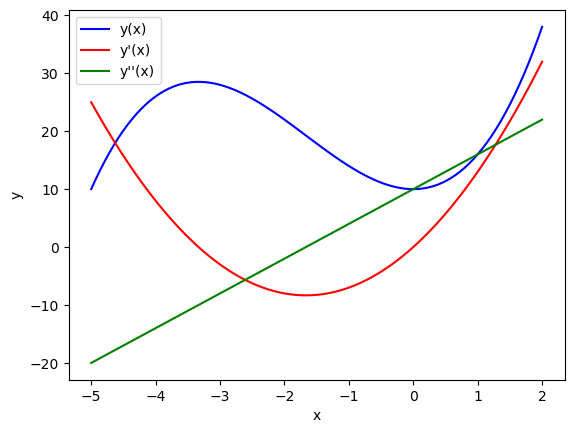

In [27]:
x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

fig, ax = plt.subplots()

ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y''(x)")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

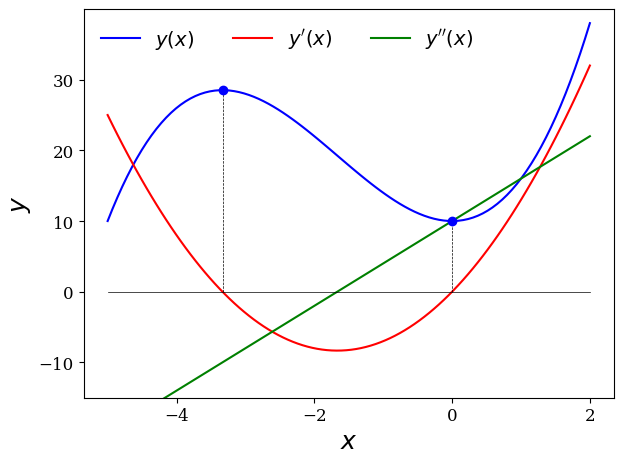

In [28]:
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

fig, ax = plt.subplots()

# Графики 
ax.plot(x, y1, lw=1.5, color="blue", label=r"$y(x)$")
ax.plot(x, y2, lw=1.5, color="red", label=r"$y'(x)$")
ax.plot(x, y3, lw=1.5, color="green", label=r"$y''(x)$")

ax.plot(x, np.zeros_like(x), lw=0.5, color="black")
ax.plot([-3.33, -3.33], [0, (-3.3)**3 + 5*(-3.3)**2 + 10], ls='--', lw=0.5, color="black")
ax.plot([0, 0], [0, 10], lw=0.5, ls='--', color="black")
ax.plot([0], [10], lw=0.5, marker='o', color="blue") # Точка 
ax.plot([-3.33], [(-3.3)**3 + 5*(-3.3)**2 + 10], lw=0.5, marker='o', color="blue") # Точка 

ax.set_ylim(-15, 40)
ax.set_yticks([-10, 0, 10, 20, 30])
ax.set_xticks([-4, -2, 0, 2])

ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.legend(loc=0, ncol=3, fontsize=14, frameon=False)

fig.tight_layout();

Text(0, 0.5, 'y')

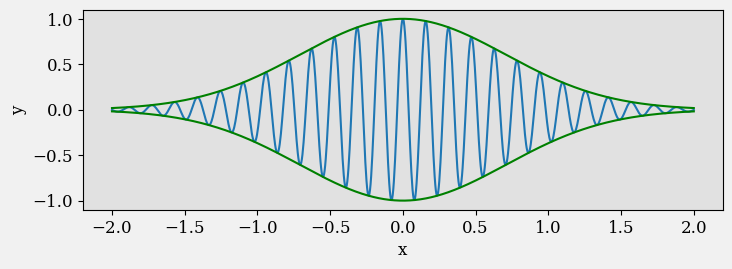

In [29]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")

# координаты осей как доли ширины и высоты холста
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)

ax.plot(x, y1 * y2)
ax.plot(x, y2, 'green')
ax.plot(x, -y2, 'green')
ax.set_xlabel("x")
ax.set_ylabel("y")

## Основные графические команды

Графические команды - это функции, которые, принимая некоторые параметры, возвращают какой-то графический результат. Это может быть текст, линия, график, диаграмма и др. В этой главе будут рассмотрены графические команды, которые создают графику высокого уровня: графики или диаграммы. Подробнее о конкретных типах графиков смотри в электронных ресурсах.

### Электронные ресурсы:

+ [Галерея примеров различной графики в matplotlib](http://matplotlib.org/gallery.html);

+ [Примеры создания геометрических фигур и форм](http://matplotlib.org/examples/shapes_and_collections/artist_reference.html).

+ [Полный список команд для pyplot](http://matplotlib.org/api/pyplot_summary.html)

В Matplotlib заложены как простые графические команды, так и достаточно сложные. Доступ к ним через pyplot означает использование синтаксиса вида `plt.[название_команды]()`.

Наиболее распространённые команды для создания научной графики в matplotlib это:

**I. Самые простые графические команды:**

+ `plt.scatter()` - маркер или точечное рисование;

+ `plt.plot()` - ломаная линия;

+ `plt.text()` - нанесение текста;

**II. Диаграммы:**

+ `plt.bar()`, `plt.barh()`, `plt.barbs()`, `broken_barh()` - столбчатая диаграмма;

+ `plt.hist()`, `plt.hist2d()`, `plt.hlines` - гистограмма;

+ `plt.pie()` - круговая диаграмма;

+ `plt.boxplot()` - "ящик с усами" (boxwhisker);

+ `plt.errorbar()` - оценка погрешности, "усы".

**III. Изображения в изолиниях:**

+ `plt.contour()`	- изолинии;

+ `plt.contourf()` - изолинии с послойной окраской;

**IV. Отображения:**

+ `plt.pcolor()`, `plt.pcolormesh()` - псевдоцветное изображение матрицы (2D массива);

+ `plt.imshow()` - вставка графики (пиксели + сглаживание);

+ `plt.matshow()` - отображение данных в виде квадратов.

**V. Заливка:**

+ `plt.fill()` - заливка многоугольника;

+ `plt.fill_between()`, `plt.fill_betweenx()` - заливка между двумя линиями;

**VI. Векторные диаграммы:**

+ `plt.streamplot()` - линии тока;

+ `plt.quiver()` - векторное поле.

[Полный список команд](http://matplotlib.org/api/pyplot_summary.html), доступный для pyplot, можно узнать на официальном сайте matplotlib. В списке нет команд для рисования различных геометрических фигур (круги, многоугольники и т.д.). Это связано с тем, что в matplotlib они вызываются через **matplotlib.patches**, который за них отвечает. Создание геометрически сложных фигур является отдельной задачей. 

Ниже показаны примеры графики, которую matplotlib создаёт "по умолчанию" при вызове той или иной графической команды. В дальнейшем будет показано как задать ту или иную конфигурацию конкретного графика и как настроить сопутствующие рисунку элементы.

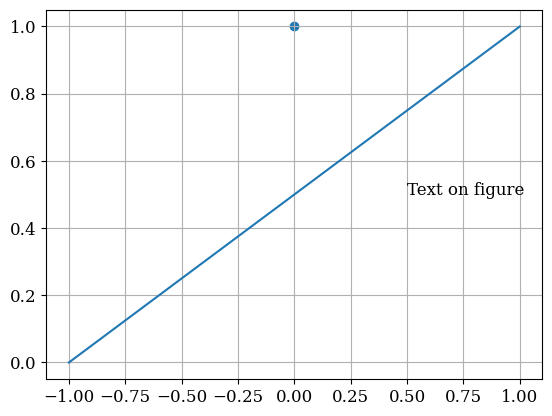

In [30]:
fig = plt.figure()
# Добавление на рисунок прямоугольной (по умолчанию) области рисования
plt.scatter(0.0, 1.0)
plt.plot([-1.0, 1.0], [0.0, 1.0])
plt.text(0.5, 0.5, 'Text on figure')
plt.grid(True)   # линии вспомогательной сетки
plt.show()

### Типы графиков

In [31]:
# Зададим параметры для поседующих графиков
fignum = 0

def hide_labels(fig, ax):
    global fignum
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.axis('tight') # отключение автоматического масштабирования

In [32]:
x = np.linspace(-3, 3, 25)
y1 = x**3+ 3 * x**2 + 10
y2 = -1.5 * x**3 + 10*x**2 - 15

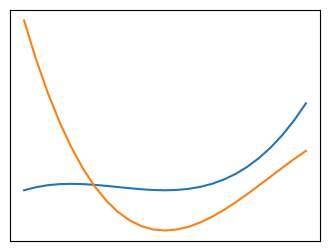

In [33]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(x, y1)
ax.plot(x, y2)

hide_labels(fig, ax)

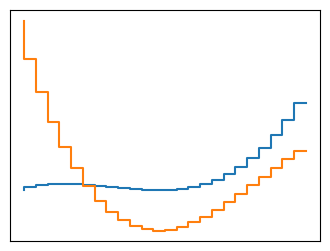

In [34]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.step(x, y1) # Ступенчатый график
ax.step(x, y2) # Ступенчатый график

hide_labels(fig, ax)

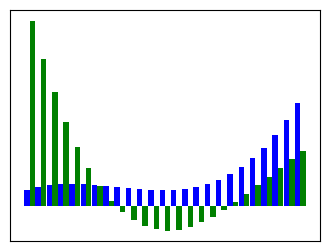

In [35]:
fig, ax = plt.subplots(figsize=(4, 3))
width = 6/50.0
ax.bar(x - width/2, y1, width=width, color="blue") # Закрашенная область между линиями
ax.bar(x + width/2, y2, width=width, color="green") # Закрашенная область между линиями

hide_labels(fig, ax)

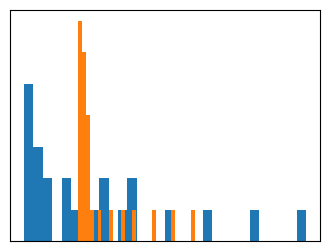

In [36]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.hist(y2, bins=30) # Гистограмма 
ax.hist(y1, bins=30) # Гистограмма 

hide_labels(fig, ax)

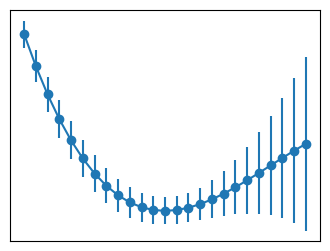

In [37]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.errorbar(x, y2, yerr=y1, fmt='o-') #  Локальная ошибка

hide_labels(fig, ax)

/var/folders/xc/5y8sdzl55133mlz80hkp_0sh0000gn/T/ipykernel_54268/15904737.py:3: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax.stem(x, y2, 'blue', markerfmt='o') # дискретный график в виде вертикальных линий
/var/folders/xc/5y8sdzl55133mlz80hkp_0sh0000gn/T/ipykernel_54268/15904737.py:4: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax.stem(x, y1, 'green', markerfmt='s') # дискретный график в виде вертикальных линий


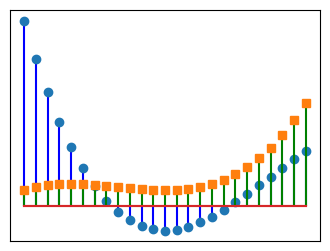

In [38]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.stem(x, y2, 'blue', markerfmt='o') # дискретный график в виде вертикальных линий
ax.stem(x, y1, 'green', markerfmt='s') # дискретный график в виде вертикальных линий

hide_labels(fig, ax)

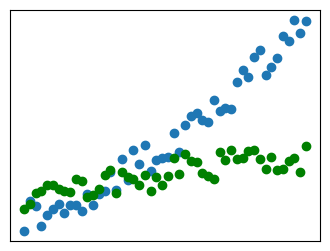

In [39]:
fig, ax = plt.subplots(figsize=(4, 3))

x = np.linspace(0, 5, 50)

ax.scatter(x, -1 + x + 0.25 * x**2 + 2 * np.random.rand(len(x)))
ax.scatter(x, np.sqrt(x) + 2 * np.random.rand(len(x)), color="green")

hide_labels(fig, ax)

## [Подписи к графику](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.annotate.html)

Text(2, 0.1, 'Уравнение: $i\\hbar\\partial_t \\Psi = \\hat{H}\\Psi$')

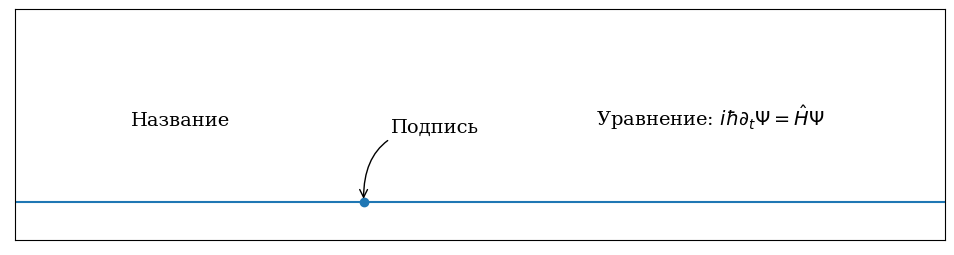

In [40]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0)

ax.text(0, 0.1, "Название", fontsize=14, family="serif")

ax.plot(1, 0, 'o')
ax.annotate("Подпись",
            fontsize=14, family="serif",
            xy=(1, 0), xycoords='data',
            xytext=(+20, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.5"))

ax.text(2, 0.1, r"Уравнение: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=14, family="serif")


### Свойства линий

In [41]:
list(range(1, 12, 2))

[1, 3, 5, 7, 9, 11]

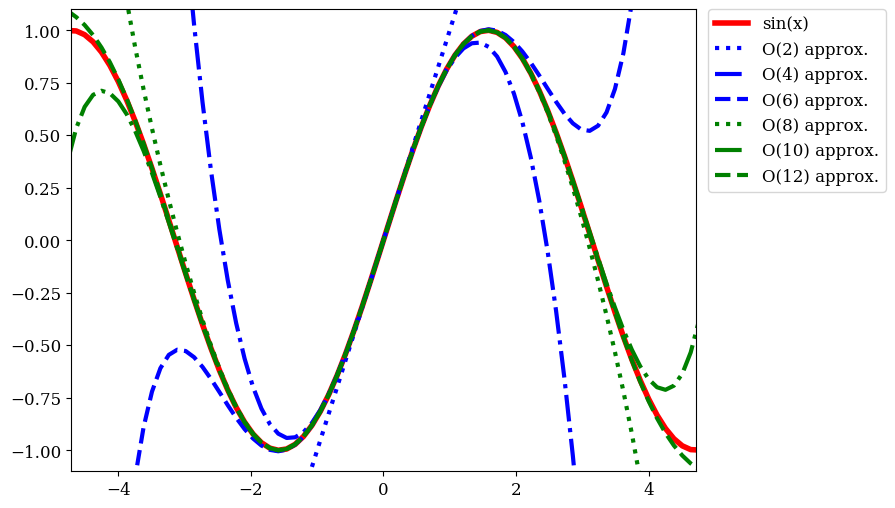

In [42]:
import sympy as s

# символьная переменная для x и числовой массив с конкретными значениями x
sym_x = s.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, n): # Вычисление значения функции разложением в ряд Тейлора: sin(x)
    return s.lambdify(sym_x, s.sin(sym_x).series(n=n+1).removeO(), 'numpy')(x)


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, np.sin(x), linewidth=4, color="red", label='sin(x)')

colors = ["blue", "green", "red"]
linestyles = [':', '-.', '--'] # Типы линий
for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
            linestyle=linestyles[idx % 3], linewidth=3,
            label="O(%d) approx." % (n+1))
    
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
fig.subplots_adjust(right=.75);

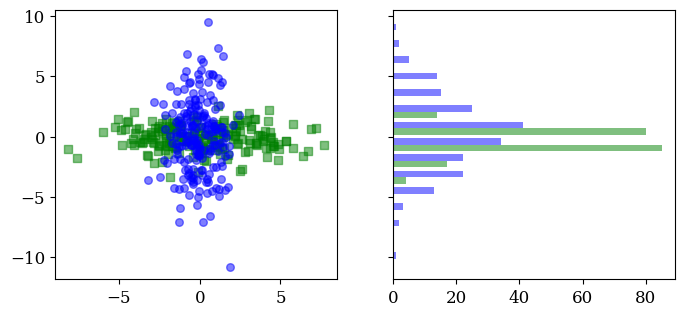

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)

data1 = np.random.randn(200, 2) * np.array([3, 1])
area1 = (np.random.randn(200) + 0.5) * 100

data2 = np.random.randn(200, 2) * np.array([1, 3])
area2 = (np.random.randn(200) + 0.5) * 100

axes[0].scatter(data1[:,0], data1[:,1], color="green", marker="s", s=30, alpha=0.5)
axes[0].scatter(data2[:,0], data2[:,1], color="blue", marker="o", s=30, alpha=0.5)

axes[1].hist([data1[:,1], data2[:,1]], bins=15, color=["green", "blue"], alpha=0.5, orientation='horizontal');

### Легенда 

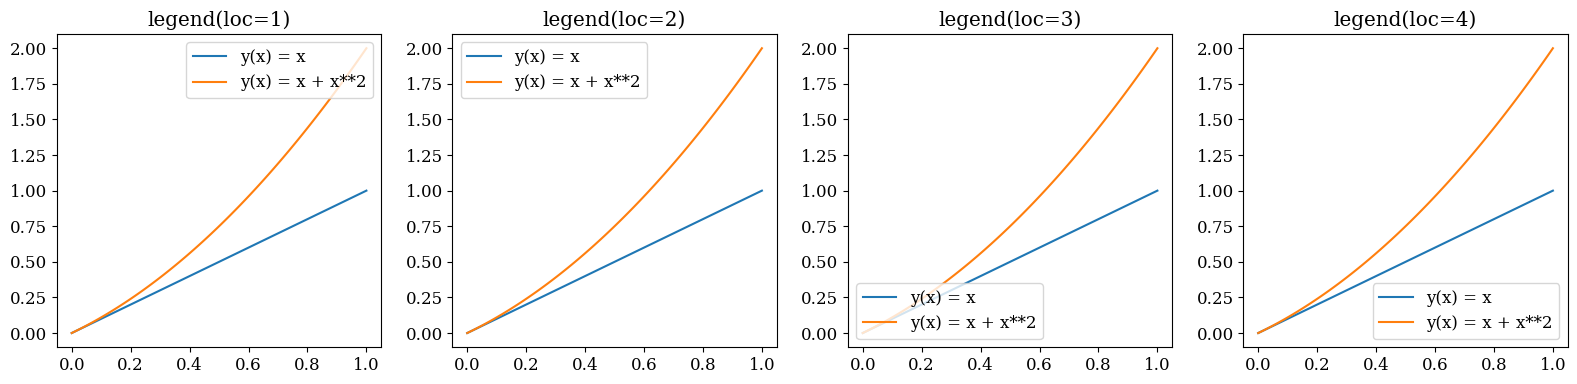

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

x = np.linspace(0, 1, 100)

for n in range(4):
    axes[n].plot(x, x, label="y(x) = x")
    axes[n].plot(x, x + x**2, label="y(x) = x + x**2")
    axes[n].legend(loc=n+1)
    axes[n].set_title("legend(loc=%d)" % (n+1))
    
fig.tight_layout() # Масштабируем, чтобы подзаголовок вписывался в область рисунка

### Подбор диапазона значений осей

Text(0.5, 1.0, "axis('equal')")

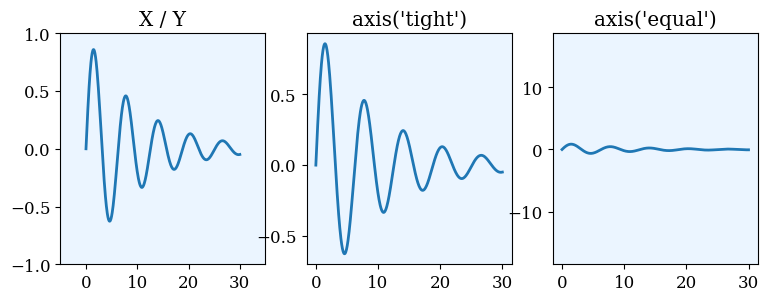

In [45]:
x = np.linspace(0, 30, 500)
y = np.sin(x) * np.exp(-x/10)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), subplot_kw={'facecolor': "#ebf5ff"})

axes[0].plot(x, y, lw=2)
axes[0].set_xlim(-5, 35)
axes[0].set_ylim(-1, 1)
axes[0].set_title("X / Y")

axes[1].plot(x, y, lw=2)
axes[1].axis('tight')
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2)
axes[2].axis('equal')
axes[2].set_title("axis('equal')")

### Деления

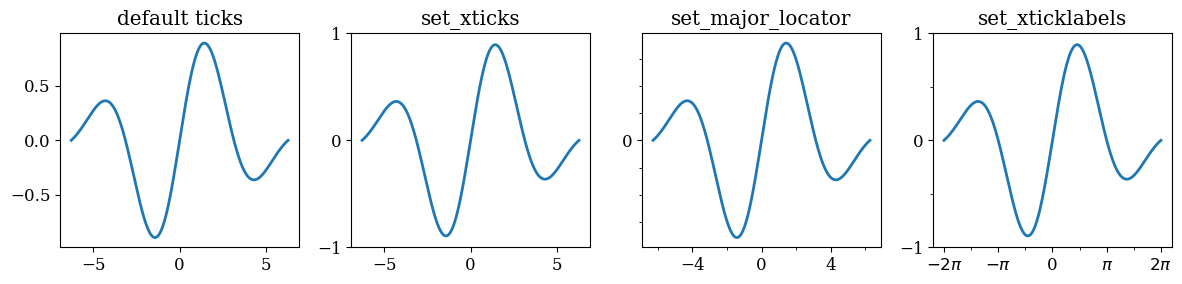

In [46]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x**2/20)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(x, y, lw=2)
axes[0].set_title("default ticks")

axes[1].plot(x, y, lw=2)
axes[1].set_yticks([-1, 0, 1])
axes[1].set_xticks([-5, 0, 5])
axes[1].set_title("set_xticks")

axes[2].plot(x, y, lw=2)
axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([-1, 0, 1]))
axes[2].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].set_title("set_major_locator")

axes[3].plot(x, y, lw=2)
axes[3].set_yticks([-1, 0, 1])
axes[3].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
axes[3].set_xticklabels(['$-2\pi$', '$-\pi$', 0, r'$\pi$', r'$2\pi$'])
axes[3].xaxis.set_minor_locator(mpl.ticker.FixedLocator([-3 * np.pi / 2, -np.pi/2, 0, np.pi/2, 3 * np.pi/2]))
axes[3].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))
axes[3].set_title("set_xticklabels")

fig.tight_layout()

### Сетка

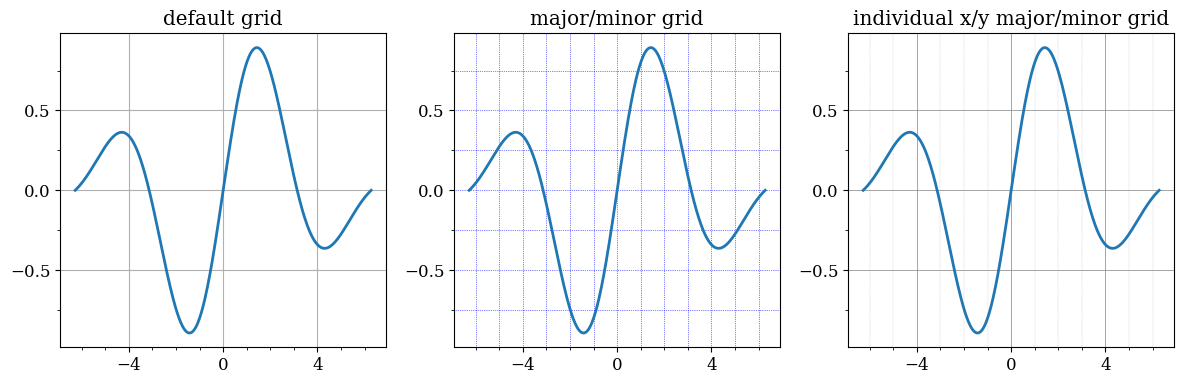

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

x_major_ticker = mpl.ticker.MultipleLocator(4)
x_minor_ticker = mpl.ticker.MultipleLocator(1)
y_major_ticker = mpl.ticker.MultipleLocator(0.5)
y_minor_ticker = mpl.ticker.MultipleLocator(0.25)

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    ax.yaxis.set_minor_locator(y_minor_ticker)

axes[0].set_title("default grid")
axes[0].grid()

axes[1].set_title("major/minor grid")
axes[1].grid(color="blue", which="both", linestyle=':', linewidth=0.5)

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.5)
axes[2].grid(color="grey", which="minor", axis='x', linestyle=':', linewidth=0.25)
axes[2].grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.5)

fig.tight_layout()

### Форматирование подписей к осям

По осям в большинстве случаев откладываются какие-либо числовые данные. 

**FormatStrFormatter** - класс для удобного выбора числового формата надписей (количество знакомест, количество значащих нулей, возможность использования экспоненциальной формы записи чисел и т.п.). 

В качестве единственного параметра его конструктор принимает строку форматирования.

Класс **ScalarFormatter** используется для простого вывода чисел. При этом у него есть несколько настроек, позволяющих сделать отображение больших чисел чуть более компактным. Именно этот форматер используется для отображения чисел по умолчанию (если не установлен никакой другой форматер).

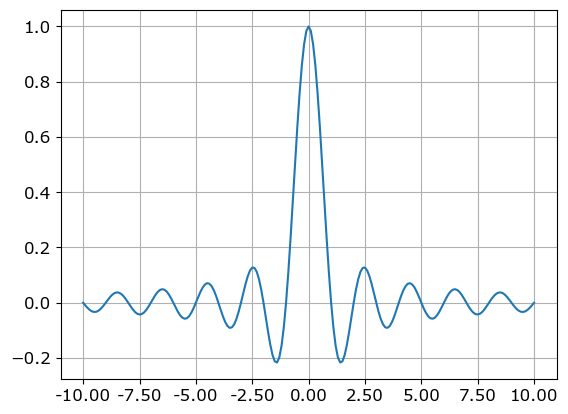

In [48]:
import numpy as np

x = np.arange (-10.0, 10.1, 0.1)
y = np.sinc (x)

plt.rc('font',**{'family':'verdana'})
figure = plt.figure()
axes = figure.add_subplot (1, 1, 1)

# Создаем форматер
formatter = mpl.ticker.FormatStrFormatter ("%.2f")

# Установка форматера для оси X
axes.xaxis.set_major_formatter (formatter)

plt.plot (x, y)

axes.grid()

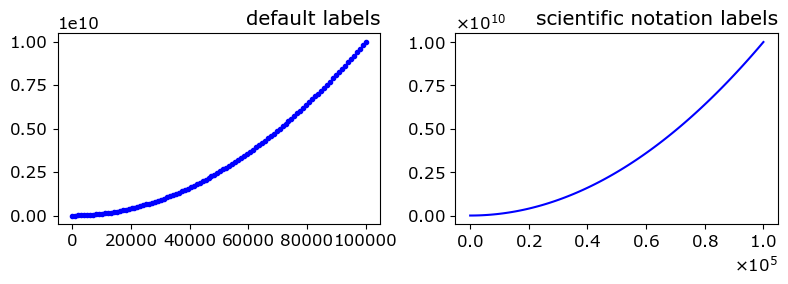

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

x = np.linspace(0, 1e5, 100)
y = x ** 2

axes[0].plot(x, y, 'b.')
axes[0].set_title("default labels", loc='right')

axes[1].plot(x, y, 'b')
axes[1].set_title("scientific notation labels", loc='right')

formatter = mpl.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

fig.tight_layout()

### Двойные оси

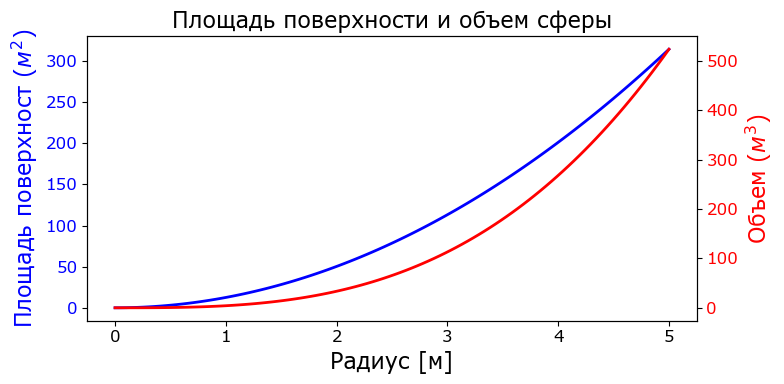

In [50]:
fig, ax1 = plt.subplots(figsize=(8, 4))

r = np.linspace(0, 5, 100)
a = 4 * np.pi * r ** 2  # area
v = (4 * np.pi / 3) * r ** 3  # volume


ax1.set_title("Площадь поверхности и объем сферы", fontsize=16)
ax1.set_xlabel("Радиус [м]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"Площадь поверхност ($м^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"Объем ($м^3$)", fontsize=16, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
    
fig.tight_layout()

### Дополнительные возможности (вставка графика)

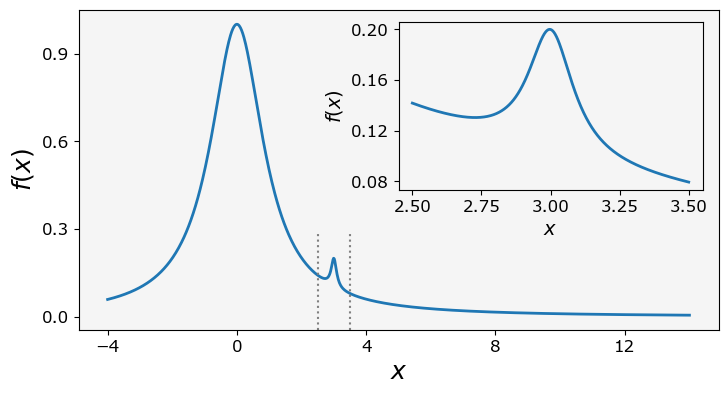

In [51]:
fig = plt.figure(figsize=(8, 4))

def f(x):
    return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)

def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), linewidth=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)
    
# Основной график
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#f5f5f5")
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

# Вставка
x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")

ax = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor='none')
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax, x, f, 14)

### Выполните задание